# Personal Information
Name: **Aleksandra Garbat**

StudentID: **15707946**

Email: [**aleksandra.garbat@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **DD.MM.YYYY**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png)

In [2]:
# Imports
import os
import numpy as np
import pandas as pd

### Data Loading

In [112]:
# Load your data here


#I produce baseline myself and compare with debiased later, 
#the data sources are already clean and standardized.......
### I need another dataset with job postings but I first need to decide on which jobs I select......
#dataset 1
#https://www.onetcenter.org/overview.html
#O'Net data: Interests= Provide general occupational interest (RIASEC) high-point codes (plus different high points) and numeric profile data for each O*NET-SOC occupation.
### the dataset gives titles of jobs, Element name (RIASEC framework) and data value for RIASEC framework
#data is going to be used for mapping of jobs to 2-dimensional space of warmth and competence

file_path = '/Users/aleksandragarbat/Desktop/Thesis/Interests.xlsx'
df = pd.read_excel(file_path)
df.head()



,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,Date,Domain Source
0,11-1011.00,Chief Executives,1.B.1.a,Realistic,OI,Occupational Interests,1.30,11/2023,Machine Learning
1,11-1011.00,Chief Executives,1.B.1.b,Investigative,OI,Occupational Interests,3.24,11/2023,Machine Learning
2,11-1011.00,Chief Executives,1.B.1.c,Artistic,OI,Occupational Interests,2.08,11/2023,Machine Learning
3,11-1011.00,Chief Executives,1.B.1.d,Social,OI,Occupational Interests,3.52,11/2023,Machine Learning
4,11-1011.00,Chief Executives,1.B.1.e,Enterprising,OI,Occupational Interests,6.88,11/2023,Machine Learning


In [114]:
#dataset2
#https://www.onetcenter.org/dictionary/29.2/excel/occupation_data.html
#This file contains O*NET-SOC code (not useful), job title, and definition/description
#will be used for debiasing MLM
file_path2 = '/Users/aleksandragarbat/Desktop/Thesis/Occupation Data.xlsx'
df2 = pd.read_excel(file_path2)
df2.head()

,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes..."
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."


### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [6]:
# Also don't forget to comment your code
# This way it's also easier to spot thought errors along the way

#data structures and summ. statistics (data for data val. is skewed, no outliers)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8307 entries, 0 to 8306
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   O*NET-SOC Code  8307 non-null   object 
 1   Title           8307 non-null   object 
 2   Element ID      8307 non-null   object 
 3   Element Name    8307 non-null   object 
 4   Scale ID        8307 non-null   object 
 5   Scale Name      8307 non-null   object 
 6   Data Value      8307 non-null   float64
 7   Date            8307 non-null   object 
 8   Domain Source   8307 non-null   object 
dtypes: float64(1), object(8)
memory usage: 584.2+ KB


,Data Value
count,8307.000000
mean,3.253728
std,2.007142
min,0.000000
25%,1.440000
50%,3.000000
75%,5.000000
max,7.000000


In [138]:
#dataset 1
#(8307=rows, 9=columns)
print(df.shape)

#onlu Data Val = float
print(df.dtypes)

#missing values= none
df.isnull().sum()  

#duplicates= none
df.duplicated().sum()

#what job titles are listed (each occurs 9 times as it refers to RIASEC) 
print(df['Title'].value_counts())


(8307, 9)
O*NET-SOC Code     object
Title              object
Element ID         object
Element Name       object
Scale ID           object
Scale Name         object
Data Value        float64
Date               object
Domain Source      object
dtype: object
Title
Chief Executives                                        9
File Clerks                                             9
Interviewers, Except Eligibility and Loan               9
Library Assistants, Clerical                            9
Loan Interviewers and Clerks                            9
                                                       ..
Career/Technical Education Teachers, Postsecondary      9
Preschool Teachers, Except Special Education            9
Kindergarten Teachers, Except Special Education         9
Elementary School Teachers, Except Special Education    9
Tank Car, Truck, and Ship Loaders                       9
Name: count, Length: 923, dtype: int64


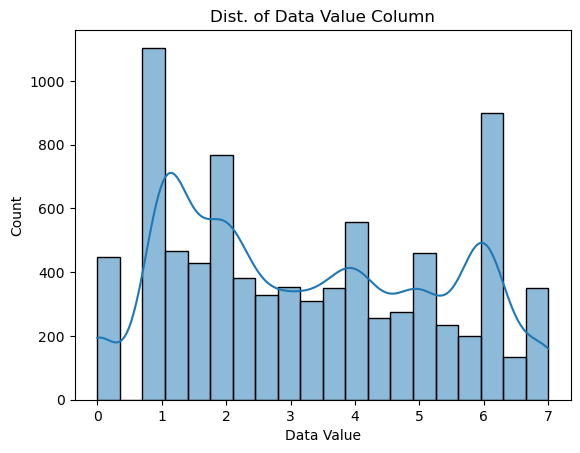

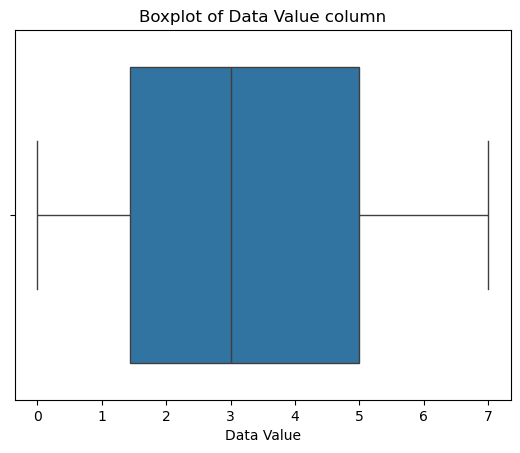

Element Name
Realistic                     923
Investigative                 923
Artistic                      923
Social                        923
Enterprising                  923
Conventional                  923
First Interest High-Point     923
Second Interest High-Point    923
Third Interest High-Point     923
Name: count, dtype: int64


Scale Name
Occupational Interests              5538
Occupational Interest High-Point    2769
Name: count, dtype: int64

In [44]:
#dataset 1
#distrubution histogram (for Data Val column)
import seaborn as sns
import matplotlib.pyplot as plt

#makes sense as the scale for RIASEC is 0-7, non-normal distribution 
sns.histplot(df['Data Value'], bins=20, kde=True)
plt.title('Dist. of Data Value Column')
plt.show()

#outlier analysis of data value col (no outliers)
#right skewed distribution 
sns.boxplot(x=df['Data Value'])
plt.title('Boxplot of Data Value column')
plt.show()

#element name column value counts (should be equal and is equal)
print(df['Element Name'].value_counts())

#scale id column's values and its counts= OI-> occupational interest; IH -> occupational interest high-point
df['Scale ID'].value_counts()

# counts for O*NET-SOC Code (not useful)
df['O*NET-SOC Code'].value_counts()

#counts for ELEMENT ID 
df['Element ID'].value_counts()

#counts for scale ID
df['Scale ID'].value_counts()

#counts for scale name
df['Scale Name'].value_counts()



In [57]:
####this will be used for mapping jobs to 2-dim. scale of Warmth and Competence
#it shows the lowest data val for each job title (I need to select the jobs i'll focus on)
sorted_df = df.sort_values(by=['Title', 'Data Value'])
lowest_values = sorted_df.groupby('Title').first()[['Data Value', 'Element Name']]
print(lowest_values)

#highest 
idx_max = df.groupby('Title')['Data Value'].idxmax()
highest_values = df.loc[idx_max, ['Title', 'Data Value', 'Element Name']]
print(highest_values)

                                                    Data Value  \
Title                                                            
Accountants and Auditors                                  1.09   
Actors                                                    1.67   
Actuaries                                                 1.18   
Acupuncturists                                            1.00   
Acute Care Nurses                                         1.00   
...                                                        ...   
Wind Turbine Service Technicians                          1.00   
Woodworking Machine Setters, Operators, and Ten...        0.00   
Word Processors and Typists                               0.00   
Writers and Authors                                       0.00   
Zoologists and Wildlife Biologists                        0.00   

                                                                  Element Name  
Title                                                       

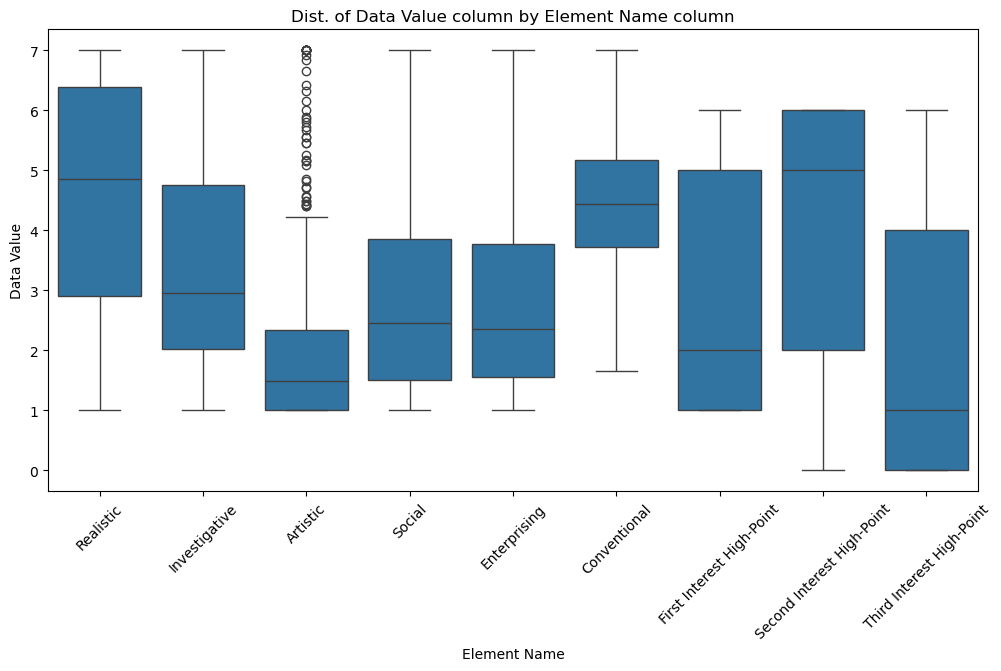

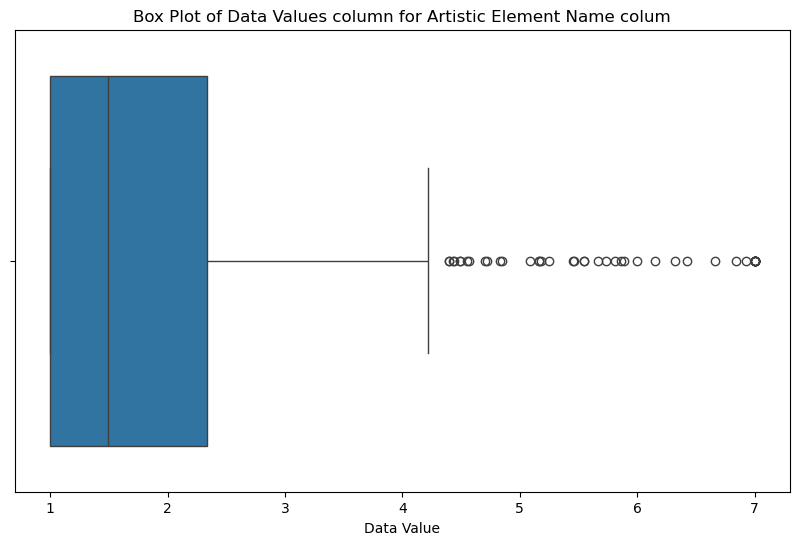

In [108]:
#distribution for RIASEC categories (last 3 are rank descriptiveness data)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Element Name', y='Data Value')
plt.title('Dist. of Data Value column by Element Name column')
plt.xticks(rotation=45)
plt.show()

####aristic has outliers but it just means that data is right skewed and jobs does are not classified as artistic
#associated with score of above 4.3 in artistic RAISEC categiry
plt.figure(figsize=(10, 6))
sns.boxplot(x=artistic_data['Data Value'])
plt.title('Box Plot of Data Values column for Artistic Element Name colum')
plt.show()

#the other box plots seems to be skewed as well=> social, enterprising right skew as well; 
#realistic-more left skewed; Conventional- approx normal

#####after selection of specific jobs for analysis it is required to compare the scores for each category
#given in Element name col. based on Data value col.


### Analysis 2: 

In [142]:
#dataset2 (1016, 3)
df2.shape

#duplicates= none
df2.duplicated().sum()

#missing values= none
df.isnull().sum()  

#all obj.
print(df2.dtypes)

#### all jobs are unique 


O*NET-SOC Code    object
Title             object
Description       object
dtype: object


       description_length   word_count
count         1016.000000  1016.000000
mean           213.967520    29.581693
std            130.458267    17.599687
min             25.000000     4.000000
25%            121.000000    17.000000
50%            185.000000    26.000000
75%            282.250000    39.000000
max            811.000000   103.000000


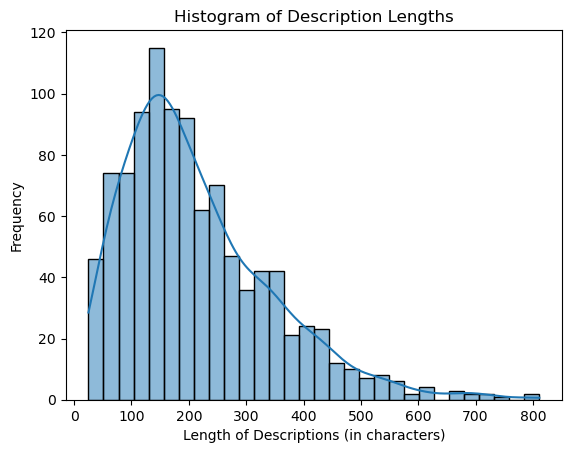

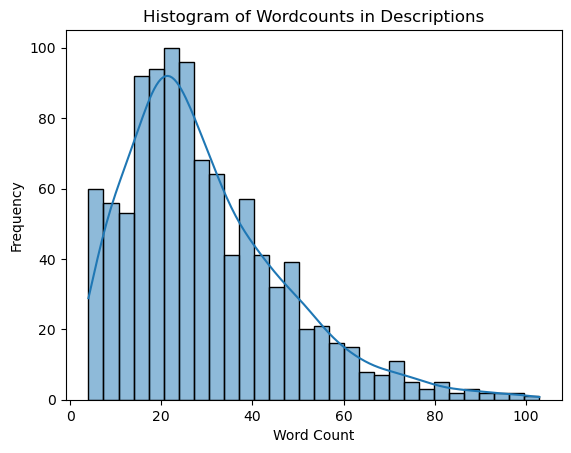

In [160]:
#lengths of descriptions (characters)
df2['description_length'] = df2['Description'].apply(len)
#lengths of desc. (words)                                               
df2['word_count'] = df2['Description'].apply(lambda x: len(str(x).split()))
print(df2[['description_length', 'word_count']].describe())

###### how long are the descriptions usually (?)
#histogram of descriptions lengths
sns.histplot(df2['description_length'], kde=True, bins=30)
plt.title('Histogram of Description Lengths')
plt.xlabel('Length of Descriptions (in characters)')
plt.ylabel('Frequency')
plt.show()

#wordcount dist. of descriptions
sns.histplot(df2['word_count'], kde=True, bins=30)
plt.title('Histogram of Wordcounts in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [200]:
####cleaning description col(new col=> cleaned_descriptions is added)
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_description(description):
    #lowercase
    description = description.lower()
    #punctuation
    description = description.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(description)
    tokens = [word for word in tokens if word not in stop_words]
    

    return tokens

descriptions = df2['Description'].tolist()

cleaned_descriptions = [clean_description(desc) for desc in descriptions]

print(cleaned_descriptions[:5])

[['determine', 'formulate', 'policies', 'provide', 'overall', 'direction', 'companies', 'private', 'public', 'sector', 'organizations', 'within', 'guidelines', 'set', 'board', 'directors', 'similar', 'governing', 'body', 'plan', 'direct', 'coordinate', 'operational', 'activities', 'highest', 'level', 'management', 'help', 'subordinate', 'executives', 'staff', 'managers'], ['communicate', 'coordinate', 'management', 'shareholders', 'customers', 'employees', 'address', 'sustainability', 'issues', 'enact', 'oversee', 'corporate', 'sustainability', 'strategy'], ['plan', 'direct', 'coordinate', 'operations', 'public', 'private', 'sector', 'organizations', 'overseeing', 'multiple', 'departments', 'locations', 'duties', 'responsibilities', 'include', 'formulating', 'policies', 'managing', 'daily', 'operations', 'planning', 'use', 'materials', 'human', 'resources', 'diverse', 'general', 'nature', 'classified', 'one', 'functional', 'area', 'management', 'administration', 'personnel', 'purchasin

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleksandragarbat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [236]:
#get all words from the cleaned desc.; calc. frequency of words and top 10 common
from collections import Counter
all_words = []
for description in cleaned_descriptions:
    all_words.extend(description)

word_freq = Counter(all_words)

print("Top 10 most freq. words:", word_freq.most_common(10))
#may is the most common= not meaningful


#no of unique words (with removed dublicates) (4741)
unique_words = len(set(all_words))
print("Unique words no.:", unique_words)


Top 10 most freq. words: [('may', 441), ('equipment', 221), ('activities', 137), ('includes', 135), ('systems', 128), ('operate', 125), ('perform', 120), ('materials', 108), ('research', 108), ('duties', 102)]
Unique words no.: 4741


  O*NET-SOC Code                                Title  \
0     11-1011.00                     Chief Executives   
1     11-1011.03        Chief Sustainability Officers   
2     11-1021.00      General and Operations Managers   
3     11-1031.00                          Legislators   
4     11-2011.00  Advertising and Promotions Managers   

                                         Description  \
0  Determine and formulate policies and provide o...   
1  Communicate and coordinate with management, sh...   
2  Plan, direct, or coordinate the operations of ...   
3  Develop, introduce, or enact laws and statutes...   
4  Plan, direct, or coordinate advertising polici...   

                                 Cleaned_Description  
0  [determine, formulate, policies, provide, over...  
1  [communicate, coordinate, management, sharehol...  
2  [plan, direct, coordinate, operations, public,...  
3  [develop, introduce, enact, laws, statutes, lo...  
4  [plan, direct, coordinate, advertising, po

### Analysis n: